<a href="https://colab.research.google.com/github/BooEiEi/project/blob/main/mean_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #นำเข้า pandas แทนที่ด้วย pd
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #นำเข้าข้อมูลจาก drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project'# ชี้ dirve ที่เราต้องการ
import missingno as mno
import missingno as msno
from sklearn import linear_model
%matplotlib inline
import matplotlib
import sklearn 
from sklearn.impute import KNNImputer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = data1.drop(data1.columns[2], axis=1)
y= data1.loc[:,['telomere length (kb)']]

In [ ]:
X

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.692308,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.538462,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.461538,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197
6,1.0,0.238806,0.324022,0.363636,0.374046,0.365854,0.203704,0.338710,0.199288,0.279126,...,0.384615,0.454545,0.568345,0.079156,0.471264,0.510949,0.118644,0.202899,0.161017,0.426230
13,0.0,0.402985,0.621974,0.568182,0.625954,0.736585,0.574074,0.903226,0.437722,0.366505,...,0.615385,0.742424,0.539568,0.121372,0.379310,0.525547,0.101695,0.188406,0.449153,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0.611940,0.616387,0.568182,0.618321,0.717073,0.518519,0.290323,0.483986,0.240291,...,0.615385,0.742424,0.453237,0.427441,0.137931,0.416058,0.457627,0.362319,0.533898,0.655738
169,0.0,0.582090,0.430168,0.522727,0.396947,0.443902,0.555556,0.338710,0.387900,0.194175,...,0.692308,0.727273,0.517986,0.118734,0.229885,0.598540,0.118644,0.391304,0.220339,0.704918
170,1.0,0.343284,0.309125,0.454545,0.274809,0.434146,0.111111,0.419355,0.213523,0.247573,...,0.538462,0.409091,0.669065,0.134565,0.413793,0.620438,0.033898,0.144928,0.144068,0.377049
171,1.0,0.626866,0.426443,0.318182,0.580153,0.580488,0.259259,0.338710,0.231317,0.371359,...,0.538462,0.469697,0.834532,0.129288,0.333333,0.846715,0.101695,0.246377,0.237288,0.475410


In [ ]:
y

,telomere length (kb)
1,0.083010
2,0.212956
3,0.075640
6,0.116757
13,0.089216
...,...
168,0.061676
169,0.032196
170,0.204034
171,0.071373


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=22)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.05911581680892061
RMSE value for k=  2 is: 0.04946492884922648
RMSE value for k=  3 is: 0.047774226497183554
RMSE value for k=  4 is: 0.04338820037473658
RMSE value for k=  5 is: 0.04253443666315168
RMSE value for k=  6 is: 0.04178903186507757
RMSE value for k=  7 is: 0.04195471757779401
RMSE value for k=  8 is: 0.04119411801959271
RMSE value for k=  9 is: 0.041425758027347714
RMSE value for k=  10 is: 0.042025366332993426
RMSE value for k=  11 is: 0.04247480377356634
RMSE value for k=  12 is: 0.04157637504887349
RMSE value for k=  13 is: 0.04045090619482787
RMSE value for k=  14 is: 0.04014168830273689
RMSE value for k=  15 is: 0.03973283069625246
RMSE value for k=  16 is: 0.03941587166650399
RMSE value for k=  17 is: 0.04050223909477297
RMSE value for k=  18 is: 0.04087005840948331
RMSE value for k=  19 is: 0.04131569794817424
RMSE value for k=  20 is: 0.042085178027341096


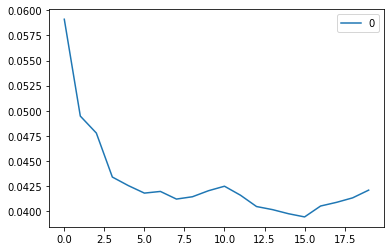

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

plt.savefig('curveKNN.png')

In [ ]:
imputer = KNNImputer(n_neighbors = 15)

In [ ]:
df_filled = imputer.fit_transform(df)
df_filled

array([[1.        , 0.58208955, 0.11947246, ..., 0.37681159, 0.20338983,
        0.54098361],
       [1.        , 0.56716418, 0.08301009, ..., 0.14492754, 0.38983051,
        0.42622951],
       [1.        , 0.07462687, 0.21295578, ..., 0.15942029, 0.28813559,
        0.47540984],
       ...,
       [1.        , 0.17910448, 0.16757176, ..., 0.01449275, 0.29661017,
        0.4273224 ],
       [1.        , 0.08955224, 0.18463926, ..., 0.08695652, 0.25423729,
        0.43715847],
       [1.        , 0.17910448, 0.15554694, ..., 0.26086957, 0.46610169,
        0.50163934]])

In [ ]:
df1 = pd.DataFrame(df_filled)

In [ ]:
df1=df1.rename(columns={0: 'Sex' ,1: 'AgeSYear', 2:'telomere length (kb)',3:'Weight',4:'Height',5:'BMI',6:'Systolic',7:'Diastolic',8:'HeartRate',9:'SMM',10:'Fat Mass',
                                       11:'% Body fat',12:'waist to hip radio',13:'abdominal circumference',14:'visceral fat area',15:'Glucose',16:'BUN',17:'Creatinine',18:'Uric Acid',19:'Cholesterol',
                                       20:'Triglyceride',21:'HDL-C',22:'LDL',23:'AST',24:'ALT',25:'Alkaline Phos',26:'HbA1c'})
df1.round(2) 

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.58,0.12,0.15,0.25,0.20,0.53,0.33,0.31,0.11,...,0.38,0.42,0.44,0.21,0.40,0.35,0.27,0.38,0.20,0.54
1,1.0,0.57,0.08,0.16,0.18,0.26,0.55,0.54,0.29,0.09,...,0.69,0.45,0.41,0.09,0.52,0.32,0.12,0.14,0.39,0.43
2,1.0,0.07,0.21,0.27,0.27,0.37,0.44,0.43,0.44,0.16,...,0.54,0.48,0.29,0.07,0.29,0.35,0.07,0.16,0.29,0.48
3,1.0,0.64,0.08,0.29,0.45,0.24,0.37,0.54,0.52,0.17,...,0.46,0.32,0.80,0.20,0.39,0.74,0.15,0.36,0.51,0.51
4,1.0,1.00,0.01,0.19,0.20,0.30,0.70,0.61,0.52,0.10,...,0.46,0.52,0.46,0.18,0.14,0.56,0.05,0.23,0.56,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1.0,0.09,0.16,0.37,0.52,0.31,0.52,0.48,0.29,0.21,...,0.31,0.39,0.81,0.07,0.38,0.82,0.19,0.23,0.13,0.46
404,0.0,0.30,0.14,0.28,0.41,0.27,0.47,0.28,0.34,0.39,...,0.69,0.77,0.45,0.27,0.13,0.51,0.19,0.19,0.31,0.54
405,1.0,0.18,0.17,0.24,0.23,0.37,0.63,0.56,0.06,0.17,...,0.38,0.17,0.47,0.06,0.61,0.34,0.27,0.01,0.30,0.43
406,1.0,0.09,0.18,0.15,0.45,0.04,0.45,0.31,0.61,0.15,...,0.38,0.42,0.81,0.05,0.79,0.57,0.15,0.09,0.25,0.44


In [ ]:
df1.isna().mean().round(4)*100

Sex                        0.0
AgeSYear                   0.0
telomere length (kb)       0.0
Weight                     0.0
Height                     0.0
BMI                        0.0
Systolic                   0.0
Diastolic                  0.0
HeartRate                  0.0
SMM                        0.0
Fat Mass                   0.0
% Body fat                 0.0
waist to hip radio         0.0
abdominal circumference    0.0
visceral fat area          0.0
Glucose                    0.0
BUN                        0.0
Creatinine                 0.0
Uric Acid                  0.0
Cholesterol                0.0
Triglyceride               0.0
HDL-C                      0.0
LDL                        0.0
AST                        0.0
ALT                        0.0
Alkaline Phos              0.0
HbA1c                      0.0
dtype: float64

In [ ]:
X = data1.drop(data1.columns[2], axis=1)
y= data1.loc[:,['telomere length (kb)']]

In [ ]:
X

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.692308,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.538462,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.461538,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197
6,1.0,0.238806,0.324022,0.363636,0.374046,0.365854,0.203704,0.338710,0.199288,0.279126,...,0.384615,0.454545,0.568345,0.079156,0.471264,0.510949,0.118644,0.202899,0.161017,0.426230
13,0.0,0.402985,0.621974,0.568182,0.625954,0.736585,0.574074,0.903226,0.437722,0.366505,...,0.615385,0.742424,0.539568,0.121372,0.379310,0.525547,0.101695,0.188406,0.449153,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0.611940,0.616387,0.568182,0.618321,0.717073,0.518519,0.290323,0.483986,0.240291,...,0.615385,0.742424,0.453237,0.427441,0.137931,0.416058,0.457627,0.362319,0.533898,0.655738
169,0.0,0.582090,0.430168,0.522727,0.396947,0.443902,0.555556,0.338710,0.387900,0.194175,...,0.692308,0.727273,0.517986,0.118734,0.229885,0.598540,0.118644,0.391304,0.220339,0.704918
170,1.0,0.343284,0.309125,0.454545,0.274809,0.434146,0.111111,0.419355,0.213523,0.247573,...,0.538462,0.409091,0.669065,0.134565,0.413793,0.620438,0.033898,0.144928,0.144068,0.377049
171,1.0,0.626866,0.426443,0.318182,0.580153,0.580488,0.259259,0.338710,0.231317,0.371359,...,0.538462,0.469697,0.834532,0.129288,0.333333,0.846715,0.101695,0.246377,0.237288,0.475410


In [ ]:
y

,telomere length (kb)
1,0.083010
2,0.212956
3,0.075640
6,0.116757
13,0.089216
...,...
168,0.061676
169,0.032196
170,0.204034
171,0.071373


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=22)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.05911581680892061
RMSE value for k=  2 is: 0.04946492884922648
RMSE value for k=  3 is: 0.047774226497183554
RMSE value for k=  4 is: 0.04338820037473658
RMSE value for k=  5 is: 0.04253443666315168
RMSE value for k=  6 is: 0.04178903186507757
RMSE value for k=  7 is: 0.04195471757779401
RMSE value for k=  8 is: 0.04119411801959271
RMSE value for k=  9 is: 0.041425758027347714
RMSE value for k=  10 is: 0.042025366332993426
RMSE value for k=  11 is: 0.04247480377356634
RMSE value for k=  12 is: 0.04157637504887349
RMSE value for k=  13 is: 0.04045090619482787
RMSE value for k=  14 is: 0.04014168830273689
RMSE value for k=  15 is: 0.03973283069625246
RMSE value for k=  16 is: 0.03941587166650399
RMSE value for k=  17 is: 0.04050223909477297
RMSE value for k=  18 is: 0.04087005840948331
RMSE value for k=  19 is: 0.04131569794817424
RMSE value for k=  20 is: 0.042085178027341096


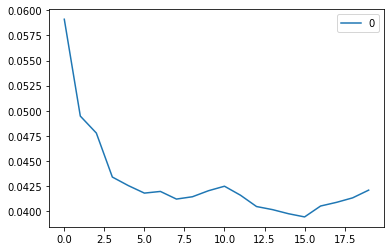

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

plt.savefig('curveKNN.png')

In [ ]:
imputer = KNNImputer(n_neighbors = 15)

In [ ]:
df_filled = imputer.fit_transform(df)
df_filled

array([[1.        , 0.58208955, 0.11947246, ..., 0.37681159, 0.20338983,
        0.54098361],
       [1.        , 0.56716418, 0.08301009, ..., 0.14492754, 0.38983051,
        0.42622951],
       [1.        , 0.07462687, 0.21295578, ..., 0.15942029, 0.28813559,
        0.47540984],
       ...,
       [1.        , 0.17910448, 0.16757176, ..., 0.01449275, 0.29661017,
        0.4273224 ],
       [1.        , 0.08955224, 0.18463926, ..., 0.08695652, 0.25423729,
        0.43715847],
       [1.        , 0.17910448, 0.15554694, ..., 0.26086957, 0.46610169,
        0.50163934]])

In [ ]:
df1 = pd.DataFrame(df_filled)

In [ ]:
df1=df1.rename(columns={0: 'Sex' ,1: 'AgeSYear', 2:'telomere length (kb)',3:'Weight',4:'Height',5:'BMI',6:'Systolic',7:'Diastolic',8:'HeartRate',9:'SMM',10:'Fat Mass',
                                       11:'% Body fat',12:'waist to hip radio',13:'abdominal circumference',14:'visceral fat area',15:'Glucose',16:'BUN',17:'Creatinine',18:'Uric Acid',19:'Cholesterol',
                                       20:'Triglyceride',21:'HDL-C',22:'LDL',23:'AST',24:'ALT',25:'Alkaline Phos',26:'HbA1c'})
df1.round(2) 

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.58,0.12,0.15,0.25,0.20,0.53,0.33,0.31,0.11,...,0.38,0.42,0.44,0.21,0.40,0.35,0.27,0.38,0.20,0.54
1,1.0,0.57,0.08,0.16,0.18,0.26,0.55,0.54,0.29,0.09,...,0.69,0.45,0.41,0.09,0.52,0.32,0.12,0.14,0.39,0.43
2,1.0,0.07,0.21,0.27,0.27,0.37,0.44,0.43,0.44,0.16,...,0.54,0.48,0.29,0.07,0.29,0.35,0.07,0.16,0.29,0.48
3,1.0,0.64,0.08,0.29,0.45,0.24,0.37,0.54,0.52,0.17,...,0.46,0.32,0.80,0.20,0.39,0.74,0.15,0.36,0.51,0.51
4,1.0,1.00,0.01,0.19,0.20,0.30,0.70,0.61,0.52,0.10,...,0.46,0.52,0.46,0.18,0.14,0.56,0.05,0.23,0.56,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1.0,0.09,0.16,0.37,0.52,0.31,0.52,0.48,0.29,0.21,...,0.31,0.39,0.81,0.07,0.38,0.82,0.19,0.23,0.13,0.46
404,0.0,0.30,0.14,0.28,0.41,0.27,0.47,0.28,0.34,0.39,...,0.69,0.77,0.45,0.27,0.13,0.51,0.19,0.19,0.31,0.54
405,1.0,0.18,0.17,0.24,0.23,0.37,0.63,0.56,0.06,0.17,...,0.38,0.17,0.47,0.06,0.61,0.34,0.27,0.01,0.30,0.43
406,1.0,0.09,0.18,0.15,0.45,0.04,0.45,0.31,0.61,0.15,...,0.38,0.42,0.81,0.05,0.79,0.57,0.15,0.09,0.25,0.44


In [ ]:
df1.isna().mean().round(4)*100

Sex                        0.0
AgeSYear                   0.0
telomere length (kb)       0.0
Weight                     0.0
Height                     0.0
BMI                        0.0
Systolic                   0.0
Diastolic                  0.0
HeartRate                  0.0
SMM                        0.0
Fat Mass                   0.0
% Body fat                 0.0
waist to hip radio         0.0
abdominal circumference    0.0
visceral fat area          0.0
Glucose                    0.0
BUN                        0.0
Creatinine                 0.0
Uric Acid                  0.0
Cholesterol                0.0
Triglyceride               0.0
HDL-C                      0.0
LDL                        0.0
AST                        0.0
ALT                        0.0
Alkaline Phos              0.0
HbA1c                      0.0
dtype: float64

In [ ]:
data = pd.read_csv(os.path.join(path, 'youth.csv'))

# ลบตัวแปรที่ไม่สำคัญ

In [ ]:
data = data.dropna(subset=['telomere length (kb) '])

In [ ]:
data=data.drop(['No.', 'LabNo','DHEAs (BRIA)'], axis=1)

In [ ]:
data=data.drop(data.columns[2: 10], axis=1)

In [ ]:
data=data.drop(data.columns[27:37], axis=1)

In [ ]:
data.isna().sum()

Sex                          0
AgeSYear                     0
telomere length (kb)         0
Weight                       8
Height                       8
BMI                          8
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
dtype: int64

# Remove outlier

## ตัดoutlier ของ telomere length

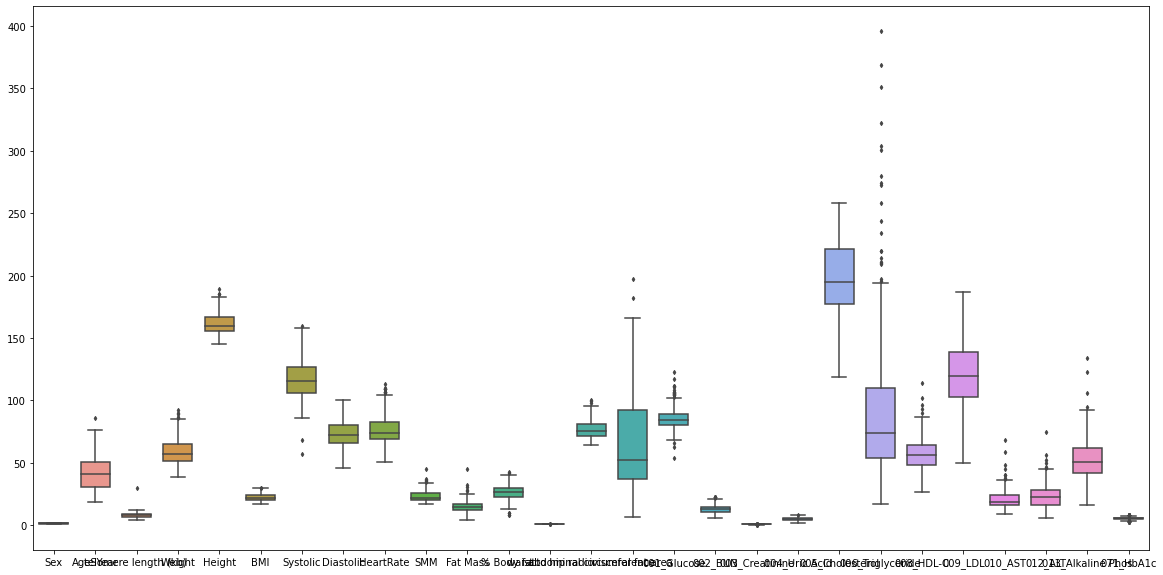

In [ ]:
matplotlib.rcParams['figure.figsize'] = 20, 10
sns.boxplot(data=data, fliersize=3, width=0.7)

In [ ]:
''' Detection '''
# IQR
Q1 = np.percentile(data['telomere length (kb) '], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['telomere length (kb) '], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['telomere length (kb) '] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['telomere length (kb) '] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (423, 27)
New Shape:  (422, 27)


In [ ]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,7.30,47.2,156.0,19.4,112.0,64.0,70.0,NaN,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,19.3,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,21.3,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,21.6,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2,86.0,4.55,49.0,154.0,20.7,129.0,79.0,83.0,NaN,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2,25.0,8.98,47.0,165.0,17.3,104.0,63.0,89.0,NaN,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,NaN
2269,2,31.0,8.23,72.2,168.0,25.6,123.0,89.0,69.0,NaN,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,NaN
2270,2,32.0,8.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,NaN
2272,1,29.0,8.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,NaN


# Normalized ด้วยวิธี MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data)

print(Scaler)

[[1.         0.58208955 0.11947246 ... 0.37681159 0.20338983 0.54098361]
 [1.         0.56716418 0.08301009 ... 0.14492754 0.38983051 0.42622951]
 [1.         0.07462687 0.21295578 ... 0.15942029 0.28813559 0.47540984]
 ...
 [1.         0.19402985 0.1772692  ... 0.05797101 0.15254237        nan]
 [0.         0.14925373 0.18269977 ... 1.         0.44915254        nan]
 [1.         0.17910448 0.14352211 ... 0.07246377 0.25423729        nan]]


In [ ]:
df = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c']) 

In [ ]:
df

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.119472,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,NaN,...,0.384615,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984
1,1.0,0.567164,0.083010,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,...,0.692308,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230
2,1.0,0.074627,0.212956,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,...,0.538462,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410
3,1.0,0.641791,0.075640,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,...,0.461538,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197
4,1.0,1.000000,0.012801,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,NaN,...,0.461538,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.184639,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,NaN,...,0.384615,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,NaN
418,1.0,0.179104,0.155547,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,NaN,...,0.384615,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,NaN
419,1.0,0.194030,0.177269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.461538,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,NaN
420,0.0,0.149254,0.182700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.692308,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,NaN


In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#standardized_data = scaler.fit_transform(data)

#print(standardized_data)

#แทนค่า missing value ด้วย Mean เมื่อมีค่าข้อมูลสูญหายน้อยกว่า 6%

In [ ]:
df.isna().mean().round(4)*100

Sex                         0.00
AgeSYear                    0.00
telomere length (kb)        0.00
Weight                      1.90
Height                      1.90
BMI                         1.90
Systolic                    1.90
Diastolic                   2.13
HeartRate                  12.09
SMM                        53.32
Fat Mass                   53.32
% Body fat                 53.32
waist to hip radio         53.32
abdominal circumference    53.55
visceral fat area          53.32
Glucose                     0.24
BUN                         0.00
Creatinine                  0.00
Uric Acid                  22.04
Cholesterol                 0.00
Triglyceride                0.00
HDL-C                       0.00
LDL                         0.00
AST                         0.00
ALT                         0.24
Alkaline Phos               6.87
HbA1c                      39.57
dtype: float64

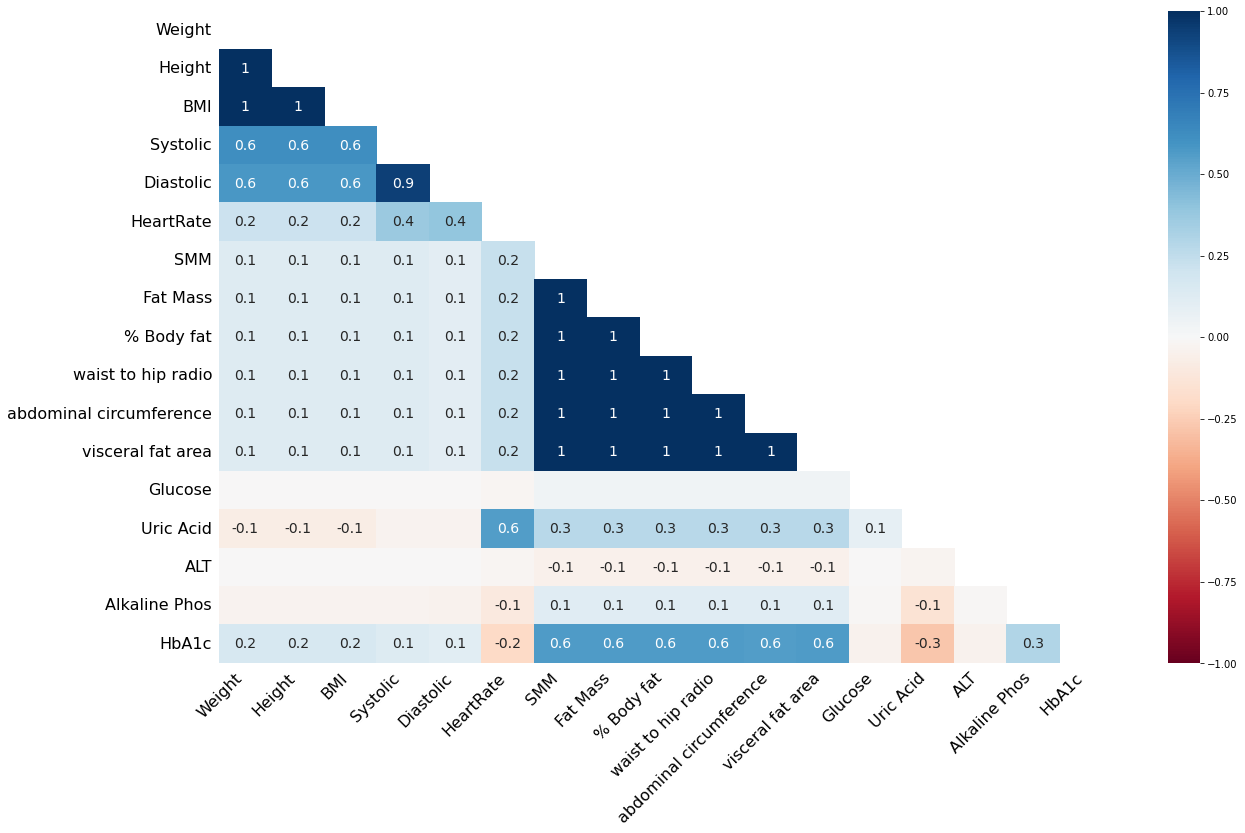

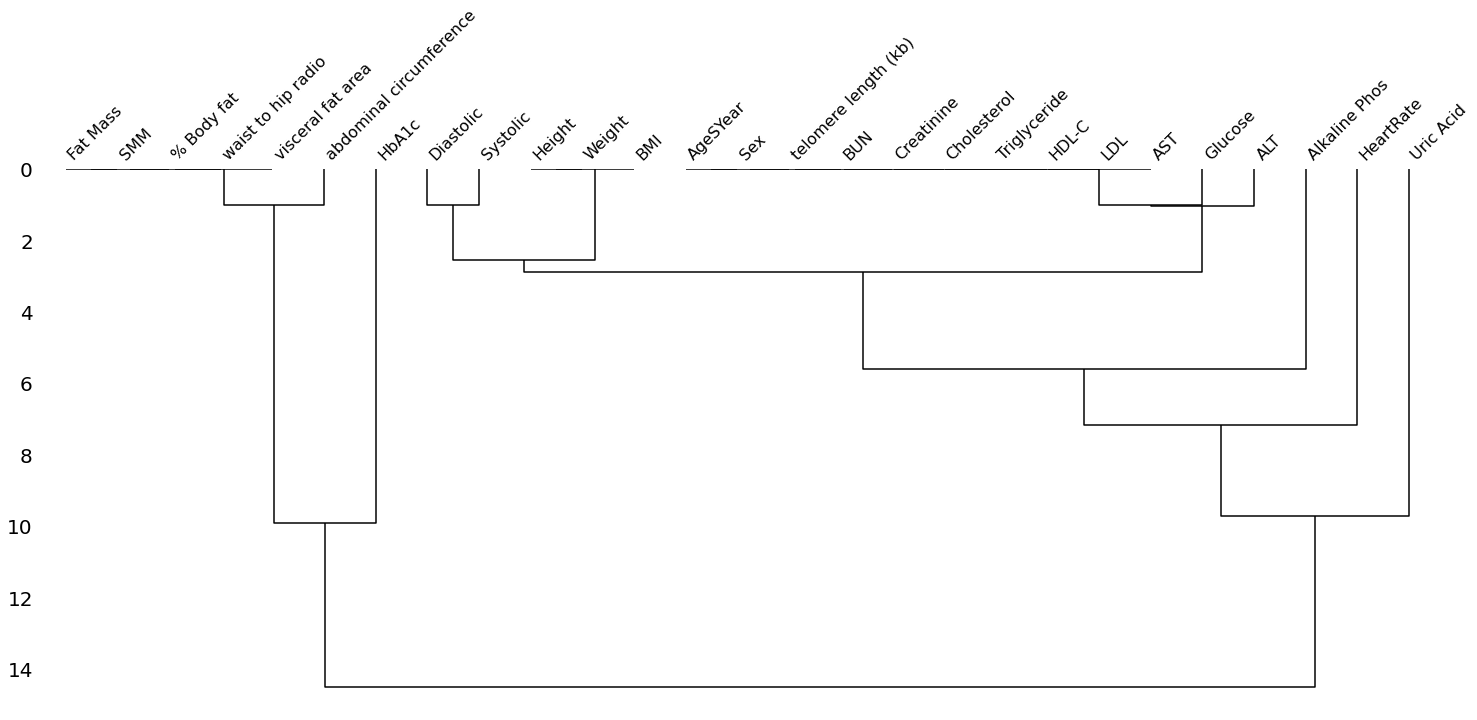

In [ ]:
msno.heatmap(df)
msno.dendrogram(df)

In [ ]:
df = df.fillna(value={'Weight':df['Weight'].mean()}) 

In [ ]:
df = df.fillna(value={'Height':df['Height'].mean()}) 

In [ ]:
df = df.fillna(value={'BMI':df['BMI'].mean()}) 

In [ ]:
df = df.fillna(value={'Systolic':df['Systolic'].mean()}) 

In [ ]:
df = df.fillna(value={'Diastolic':df['Diastolic'].mean()}) 

In [ ]:
df = df.fillna(value={'Glucose':df['Glucose'].mean()}) 

In [ ]:
df = df.fillna(value={'ALT':df['ALT'].mean()}) 

In [ ]:
df

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.119472,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,NaN,...,0.384615,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984
1,1.0,0.567164,0.083010,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,...,0.692308,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230
2,1.0,0.074627,0.212956,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,...,0.538462,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410
3,1.0,0.641791,0.075640,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,...,0.461538,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197
4,1.0,1.000000,0.012801,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,NaN,...,0.461538,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.184639,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,NaN,...,0.384615,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,NaN
418,1.0,0.179104,0.155547,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,NaN,...,0.384615,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,NaN
419,1.0,0.194030,0.177269,0.367208,0.386638,0.415404,0.584364,0.497624,NaN,NaN,...,0.461538,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,NaN
420,0.0,0.149254,0.182700,0.367208,0.386638,0.415404,0.584364,0.497624,NaN,NaN,...,0.692308,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,NaN


# แทนค่าด้วยวิธี KNN

In [ ]:
data1 = df.dropna()
data1

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
1,1.0,0.567164,0.083010,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,...,0.692308,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230
2,1.0,0.074627,0.212956,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,...,0.538462,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410
3,1.0,0.641791,0.075640,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,...,0.461538,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197
6,1.0,0.238806,0.116757,0.324022,0.363636,0.374046,0.365854,0.203704,0.338710,0.199288,...,0.384615,0.454545,0.568345,0.079156,0.471264,0.510949,0.118644,0.202899,0.161017,0.426230
13,0.0,0.402985,0.089216,0.621974,0.568182,0.625954,0.736585,0.574074,0.903226,0.437722,...,0.615385,0.742424,0.539568,0.121372,0.379310,0.525547,0.101695,0.188406,0.449153,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0.611940,0.061676,0.616387,0.568182,0.618321,0.717073,0.518519,0.290323,0.483986,...,0.615385,0.742424,0.453237,0.427441,0.137931,0.416058,0.457627,0.362319,0.533898,0.655738
169,0.0,0.582090,0.032196,0.430168,0.522727,0.396947,0.443902,0.555556,0.338710,0.387900,...,0.692308,0.727273,0.517986,0.118734,0.229885,0.598540,0.118644,0.391304,0.220339,0.704918
170,1.0,0.343284,0.204034,0.309125,0.454545,0.274809,0.434146,0.111111,0.419355,0.213523,...,0.538462,0.409091,0.669065,0.134565,0.413793,0.620438,0.033898,0.144928,0.144068,0.377049
171,1.0,0.626866,0.071373,0.426443,0.318182,0.580153,0.580488,0.259259,0.338710,0.231317,...,0.538462,0.469697,0.834532,0.129288,0.333333,0.846715,0.101695,0.246377,0.237288,0.475410


In [ ]:
X = data1.drop(data1.columns[2], axis=1)
y= data1.loc[:,['telomere length (kb)']]

In [ ]:
X

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.692308,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.538462,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.461538,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197
6,1.0,0.238806,0.324022,0.363636,0.374046,0.365854,0.203704,0.338710,0.199288,0.279126,...,0.384615,0.454545,0.568345,0.079156,0.471264,0.510949,0.118644,0.202899,0.161017,0.426230
13,0.0,0.402985,0.621974,0.568182,0.625954,0.736585,0.574074,0.903226,0.437722,0.366505,...,0.615385,0.742424,0.539568,0.121372,0.379310,0.525547,0.101695,0.188406,0.449153,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0.611940,0.616387,0.568182,0.618321,0.717073,0.518519,0.290323,0.483986,0.240291,...,0.615385,0.742424,0.453237,0.427441,0.137931,0.416058,0.457627,0.362319,0.533898,0.655738
169,0.0,0.582090,0.430168,0.522727,0.396947,0.443902,0.555556,0.338710,0.387900,0.194175,...,0.692308,0.727273,0.517986,0.118734,0.229885,0.598540,0.118644,0.391304,0.220339,0.704918
170,1.0,0.343284,0.309125,0.454545,0.274809,0.434146,0.111111,0.419355,0.213523,0.247573,...,0.538462,0.409091,0.669065,0.134565,0.413793,0.620438,0.033898,0.144928,0.144068,0.377049
171,1.0,0.626866,0.426443,0.318182,0.580153,0.580488,0.259259,0.338710,0.231317,0.371359,...,0.538462,0.469697,0.834532,0.129288,0.333333,0.846715,0.101695,0.246377,0.237288,0.475410


In [ ]:
y

,telomere length (kb)
1,0.083010
2,0.212956
3,0.075640
6,0.116757
13,0.089216
...,...
168,0.061676
169,0.032196
170,0.204034
171,0.071373


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=22)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.05911581680892061
RMSE value for k=  2 is: 0.04946492884922648
RMSE value for k=  3 is: 0.047774226497183554
RMSE value for k=  4 is: 0.04338820037473658
RMSE value for k=  5 is: 0.04270230894444239
RMSE value for k=  6 is: 0.041787173462454474
RMSE value for k=  7 is: 0.04182061105471395
RMSE value for k=  8 is: 0.040971977785049456
RMSE value for k=  9 is: 0.04145787512867232
RMSE value for k=  10 is: 0.04215202125870314
RMSE value for k=  11 is: 0.04250198952808319
RMSE value for k=  12 is: 0.04160096013998794
RMSE value for k=  13 is: 0.04046924662705923
RMSE value for k=  14 is: 0.040115391983312716
RMSE value for k=  15 is: 0.03975401137161075
RMSE value for k=  16 is: 0.03941354034354642
RMSE value for k=  17 is: 0.040508488417976156
RMSE value for k=  18 is: 0.040860916778257976
RMSE value for k=  19 is: 0.04132652193749233
RMSE value for k=  20 is: 0.04222244285181483


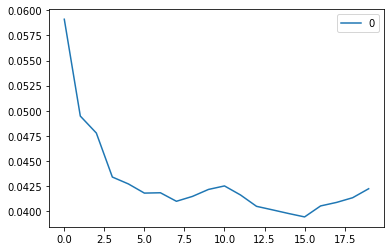

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

plt.savefig('curveKNN.png')

In [ ]:
imputer = KNNImputer(n_neighbors = 15)

In [ ]:
df_filled = imputer.fit_transform(df)
df_filled

array([[1.        , 0.58208955, 0.11947246, ..., 0.37681159, 0.20338983,
        0.54098361],
       [1.        , 0.56716418, 0.08301009, ..., 0.14492754, 0.38983051,
        0.42622951],
       [1.        , 0.07462687, 0.21295578, ..., 0.15942029, 0.28813559,
        0.47540984],
       ...,
       [1.        , 0.19402985, 0.1772692 , ..., 0.05797101, 0.15254237,
        0.48196721],
       [0.        , 0.14925373, 0.18269977, ..., 1.        , 0.44915254,
        0.58688525],
       [1.        , 0.17910448, 0.14352211, ..., 0.07246377, 0.25423729,
        0.47978142]])

In [ ]:
df1 = pd.DataFrame(df_filled)
df1.round(2) 

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2.0,58.0,7.30,47.20,156.00,19.40,112.00,64.00,70.00,21.67,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.80
1,2.0,57.0,6.36,47.40,153.00,20.20,114.00,75.00,69.00,19.30,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.10
2,2.0,24.0,9.71,53.20,157.00,21.60,103.00,69.00,78.00,21.30,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.40
3,2.0,62.0,6.17,54.40,165.00,20.00,95.00,75.00,83.00,21.60,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.60
4,2.0,86.0,4.55,49.00,154.00,20.70,129.00,79.00,83.00,21.62,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,8.98,47.00,165.00,17.30,104.00,63.00,89.00,21.77,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.48
418,2.0,31.0,8.23,72.20,168.00,25.60,123.00,89.00,69.00,24.28,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.19
419,2.0,32.0,8.79,52.66,159.40,20.73,112.20,70.60,79.67,21.76,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.18
420,1.0,29.0,8.93,61.55,167.93,21.73,114.70,74.00,81.33,25.19,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,5.11


In [ ]:
df1=df1.rename(columns={0: 'Sex' ,1: 'AgeSYear', 2:'telomere length (kb)',3:'Weight',4:'Height',5:'BMI',6:'Systolic',7:'Diastolic',8:'HeartRate',9:'SMM',10:'Fat Mass',
                                       11:'% Body fat',12:'waist to hip radio',13:'abdominal circumference',14:'visceral fat area',15:'Glucose',16:'BUN',17:'Creatinine',18:'Uric Acid',19:'Cholesterol',
                                       20:'Triglyceride',21:'HDL-C',22:'LDL',23:'AST',24:'ALT',25:'Alkaline Phos',26:'HbA1c'})
df1.round(2) 

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,2.0,58.0,7.30,47.20,156.00,19.40,112.00,64.00,70.00,21.67,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.80
1,2.0,57.0,6.36,47.40,153.00,20.20,114.00,75.00,69.00,19.30,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.10
2,2.0,24.0,9.71,53.20,157.00,21.60,103.00,69.00,78.00,21.30,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.40
3,2.0,62.0,6.17,54.40,165.00,20.00,95.00,75.00,83.00,21.60,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.60
4,2.0,86.0,4.55,49.00,154.00,20.70,129.00,79.00,83.00,21.62,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,8.98,47.00,165.00,17.30,104.00,63.00,89.00,21.77,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.48
418,2.0,31.0,8.23,72.20,168.00,25.60,123.00,89.00,69.00,24.28,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.19
419,2.0,32.0,8.79,52.66,159.40,20.73,112.20,70.60,79.67,21.76,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.18
420,1.0,29.0,8.93,61.55,167.93,21.73,114.70,74.00,81.33,25.19,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,5.11


In [ ]:
df1.isna().mean().round(4)*100

Sex                        0.0
AgeSYear                   0.0
telomere length (kb)       0.0
Weight                     0.0
Height                     0.0
BMI                        0.0
Systolic                   0.0
Diastolic                  0.0
HeartRate                  0.0
SMM                        0.0
Fat Mass                   0.0
% Body fat                 0.0
waist to hip radio         0.0
abdominal circumference    0.0
visceral fat area          0.0
Glucose                    0.0
BUN                        0.0
Creatinine                 0.0
Uric Acid                  0.0
Cholesterol                0.0
Triglyceride               0.0
HDL-C                      0.0
LDL                        0.0
AST                        0.0
ALT                        0.0
Alkaline Phos              0.0
HbA1c                      0.0
dtype: float64